<a href="https://colab.research.google.com/github/atharv-d21/regression_house_price/blob/main/github_regression_predict_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# loading the training data from csv file to a dataframe format
df = pd.read_csv('https://raw.githubusercontent.com/atharv-d21/regression_house_price/refs/heads/main/Data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [36]:
# filling all the null values with zeros
df = df.fillna(0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [37]:
# one-hot encoding the training data for the model
df = pd.get_dummies(df)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [38]:
# replacing true with 1 and false with 0 to comvert the data frame into completely numerical form
df = df.replace({True: 1, False: 0})
df

<ipython-input-38-4e549d2a6dc7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [39]:
# making features and labels out of the dataframe for the model
trainingX = df.drop(columns=['SalePrice', 'Id'])
trainingY = df['SalePrice']

In [40]:
# making a linear regression model to make predictions
model =  tf.keras.Sequential({
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
})

In [41]:
# compiling the model and setting up the loss function,  optimizer and learning rate
model.compile(loss=tf.keras.losses.MAE, optimizer = tf.keras.optimizers.Adam())

In [42]:
# using learing rate scheduler to determine the optimal learning rate for our model
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20)
)

In [43]:
# fitting our model with training data for 100 epochs
history = model.fit(trainingX, trainingY, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 181904.4531 - learning_rate: 1.0000e-04
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179385.8594 - learning_rate: 1.1220e-04
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184176.2969 - learning_rate: 1.2589e-04
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182779.3906 - learning_rate: 1.4125e-04
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179091.3438 - learning_rate: 1.5849e-04
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182464.5469 - learning_rate: 1.7783e-04
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179024.9219 - learning_rate: 1.9953e-04
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 172176.9844 - learning_rate: 2.2387e-04
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 162540.3906 - learning_rate: 2.5119e-04
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 146556.7969 - learning_rate: 2.8184e-04
Epoch 11/

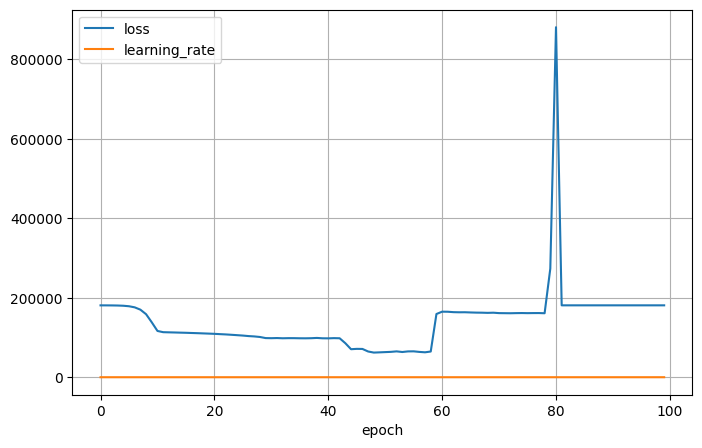

In [44]:
# ploting
pd.DataFrame(history.history).plot(figsize=(8, 5), xlabel='epoch')
plt.grid(True)
plt.show()

Text(0, 0.5, 'loss')

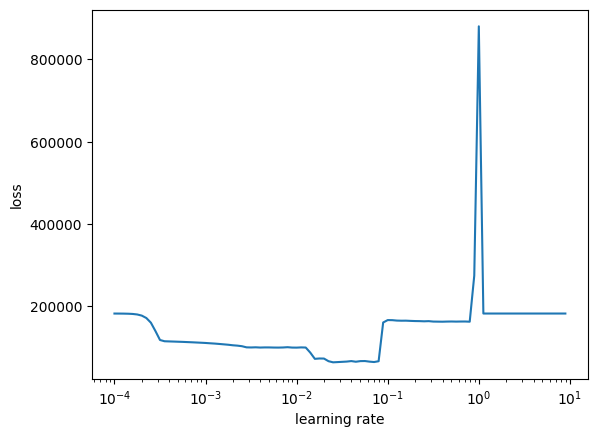

In [45]:
# plotting the learning rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')

Using above obersations we can say that the most optimal leaning rate for our model is 0.014125

In [46]:
# making a linear regression model with most optimal parameters for our dataset
model_1 = tf.keras.Sequential({
    tf.keras.layers.Dense(303, activation='relu'),
    tf.keras.layers.Dense(203, activation='relu'),
    tf.keras.layers.Dense(135, activation='relu'),
    tf.keras.layers.Dense(90, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1)
})

In [47]:
# compiling our new model with the optimal learning rate
model_1.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(0.014125))

In [48]:
# fitting our model with training data for 150 epochs
history_1 = model_1.fit(trainingX, trainingY, epochs=150)

Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 147922.4219
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44681.8164
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31337.4941
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33291.1758
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28096.6035
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28965.6699
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26566.2617
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28966.6504
Epoch 9/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28889.3105
Epoch 10/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27921.7988
Epoch 11/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35041.2461
Epoch 12/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26007.2695
Epoch 13/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28373.8125
Epoch 14/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27818.5703
Epoch 15/150
4